Data Mining: Basic Concepts - WS'19/20 
---------------
``` 
> University of Konstanz 
> Department of Computer and Information Science
> Dr. Johannes Fuchs, Eren Cakmak, Frederik Dennig
```

---

#### Exercise 1: Multilayer Neural Networks Training - _(4 Points)_

Imagine you have the following feed-forward neural network containing 2 input neurons, 1 hidden neuron and 2 output neurons:

![Network](Graphs/Ass03_Network.png)

w1 to w4 represent the weights of the connections between the neurons. Their exact values can be found in this table:

|Weight|Value|
|-----|------|
|w1|0.4|
|w2|-0.2|
|w3|0.2|
|w4|0.6|

Non-input Neuron also have a Bias shown in this table:


|Neuron|Bias|
|-----|-----|
|N3|0.1|
|N4|0.1|
|N5|-0.1|

Assume a sigmoidal activation function $g(x) = 1 / (1+e^{-x})$ in each Neuron and a learning rate of $0.2$. Do not use Python for this Exercise.

Calculate the Input and Output of N3, N4 and N5 if N1 gets an Input of 2 and N2 gets an input of 3.

_(Hint: Input Neurons do not use the activation function. The Output of N1 and N2 are therefore the same as their respective Inputs.)_

__For this exercise, please cut each result at the fifth digit after the dot. (e.g. 0.123456789 becomes 0.12345)__


>  
> **Input N3**  
> $\dots = (2 \cdot 0.4) + (3 \cdot -0.2) + (0.1) = 0.8 - 0.6 + 0.1 = 0.3$  
>  
> **Output N3**  
> $\dots = \frac{1}{1 + e^{-x}} = \frac{1}{1 + e^{-0.3}} = 0.57444$  
>  
----
>  
> **Input N4**  
> $\dots = (0.57444 \cdot 0.2) + (0.1) = 0.21488$  
>  
> **Output N4**  
> $\dots = \frac{1}{1 + e^{-0.21488}} = 0.55351$  
>  
----
>  
> **Input N5**  
> $\dots = (0.57444 \cdot 0.6) + (-0.1) = 0.24466$  
>  
> **Output N5**  
> $\dots = \frac{1}{1 + e^{-0.24466}} = 0.56086$  
>  


---

#### Exercise 2: Perceptron Implementation - _(11 Points)_

In this exercise, the task is to implement a Perceptron algorithm in Python. Below, we give a bi-dimensional dataset and the class values.

|X    |Y    |Class(OR)|Class(AND)|
|-----|-----|---------|---------|
| 0 | 0 | 0 | 0 |        
| 0 | 1 | 1 | 0 |
| 1 | 0 | 1 | 0 |
| 1 | 1 | 1 | 1 |

##### __(a) In your implementation of a Perceptron, build a Python Class `Perceptron` with the following methods and inputs:__
* Constructor: `__init__(self, learning_rate, number_iterations)`
* Learning funtion: `learn(self, X, y)` where `X` is the training example data as a 2D `numpy.array`and `y`is the training data labels example as a  a 1D `numpy.array`
* Predict function: `predict(self, x)` where `x` is a  1D `numpy.array` with the data that should be classified  
* learning rate

_Your function should print the weights for each iteration and data point._

In [1]:
import numpy as np

# Create the data
array_input = np.array([[0,0],
                        [0,1],
                        [1,0],
                        [1,1]])
array_class_or = np.array([0,1,1,1])
array_class_and = np.array([0,0,0,1])
array_class_nand = np.array([1,1,1,0])
array_class_xor = np.array([0,1,1,0])

print('Input:\n', array_input,'\n')
print('Class OR:  ', array_class_or)
print('Class AND: ', array_class_and)
print('Class NAND:', array_class_nand)
print('Class XOR: ', array_class_xor)

Input:
 [[0 0]
 [0 1]
 [1 0]
 [1 1]] 

Class OR:   [0 1 1 1]
Class AND:  [0 0 0 1]
Class NAND: [1 1 1 0]
Class XOR:  [0 1 1 0]


In [2]:
class Perceptron:
    """Implementation of Perceptron-Algorithm
    
    When called, takes on two arguments:
    - learning_rate     (default: 0.1)
    - number_iterations (default: 50)
    
    learning_rate:
    Speed of which the algorithm is adapting to the produced error.
    
    number_iterations:
    Defines how many "steps" are taken when training the perceptron.
    Has to be an integer value.
    """
    def __init__(self, learning_rate=0.1, number_iterations=50):
        self.learning_rate = learning_rate
        self.number_iterations = number_iterations
    
    def predict(self, x):
        input_sum = np.dot(x, self.weights[1:]) + self.weights[0]
        if input_sum <= 0.5:
            activation = 0
        else:
            activation = 1
        return activation
    
    def learn(self, X, y):
        #self.weights = np.random.rand(len(X[0])+1)    # random weights
        self.weights = np.array([0.0] * (len(X[0])+1)) # zero weights (as in lecture)
        
        for i in range(self.number_iterations):
            print('\nIteration Step:',i+1)
            for inputs, label in zip(X, y):
                prediction = self.predict(inputs)
                correction = (label - prediction)*self.learning_rate
                
                self.weights[0] = self.weights[0]+correction
                self.weights[1:] = self.weights[1:]+(inputs*correction)
                
                print(self.weights)

In [3]:
perc = Perceptron(0.1, 10)
perc.learn(array_input, array_class_nand)

print('\n\nTrained: NAND')
print('Results are     :',
      perc.predict([0,0]),
      perc.predict([1,0]),
      perc.predict([0,1]),
      perc.predict([1,1]))
print('Results shoud be:',
      array_class_nand)


Iteration Step: 1
[0.1 0.  0. ]
[0.2 0.  0.1]
[0.3 0.1 0.1]
[0.3 0.1 0.1]

Iteration Step: 2
[0.4 0.1 0.1]
[0.5 0.1 0.2]
[0.5 0.1 0.2]
[0.4 0.  0.1]

Iteration Step: 3
[0.5 0.  0.1]
[0.5 0.  0.1]
[0.6 0.1 0.1]
[0.5 0.  0. ]

Iteration Step: 4
[0.6 0.  0. ]
[0.6 0.  0. ]
[0.6 0.  0. ]
[ 0.5 -0.1 -0.1]

Iteration Step: 5
[ 0.6 -0.1 -0.1]
[ 0.7 -0.1  0. ]
[ 0.7 -0.1  0. ]
[ 0.6 -0.2 -0.1]

Iteration Step: 6
[ 0.6 -0.2 -0.1]
[ 0.7 -0.2  0. ]
[ 0.8 -0.1  0. ]
[ 0.7 -0.2 -0.1]

Iteration Step: 7
[ 0.7 -0.2 -0.1]
[ 0.7 -0.2 -0.1]
[ 0.8 -0.1 -0.1]
[ 0.7 -0.2 -0.2]

Iteration Step: 8
[ 0.7 -0.2 -0.2]
[ 0.8 -0.2 -0.1]
[ 0.8 -0.2 -0.1]
[ 0.8 -0.2 -0.1]

Iteration Step: 9
[ 0.8 -0.2 -0.1]
[ 0.8 -0.2 -0.1]
[ 0.8 -0.2 -0.1]
[ 0.8 -0.2 -0.1]

Iteration Step: 10
[ 0.8 -0.2 -0.1]
[ 0.8 -0.2 -0.1]
[ 0.8 -0.2 -0.1]
[ 0.8 -0.2 -0.1]


Trained: NAND
Results are     : 1 1 1 0
Results shoud be: [1 1 1 0]


> Gives the same results and the same weights as the
> demonstration in the lecture (and on the slides)

##### __(b) Run your Perceptron and set an initial value for the learning rate, the weights (e.g., `<0,0,0>`) and number of iterations. Check the for the OR and AND class the correctness of the classification outputs.__

In [4]:
# Calling and training the perceptron on OR
perc = Perceptron(0.1, 5)
perc.learn(array_input, array_class_or)

print('\n\nTrained: OR')
print('Results are:       ',
      perc.predict([0,0]),
      perc.predict([1,0]),
      perc.predict([0,1]),
      perc.predict([1,1]))
print('Results should be:',
      array_class_or)


Iteration Step: 1
[0. 0. 0.]
[0.1 0.  0.1]
[0.2 0.1 0.1]
[0.3 0.2 0.2]

Iteration Step: 2
[0.3 0.2 0.2]
[0.4 0.2 0.3]
[0.4 0.2 0.3]
[0.4 0.2 0.3]

Iteration Step: 3
[0.4 0.2 0.3]
[0.4 0.2 0.3]
[0.4 0.2 0.3]
[0.4 0.2 0.3]

Iteration Step: 4
[0.4 0.2 0.3]
[0.4 0.2 0.3]
[0.4 0.2 0.3]
[0.4 0.2 0.3]

Iteration Step: 5
[0.4 0.2 0.3]
[0.4 0.2 0.3]
[0.4 0.2 0.3]
[0.4 0.2 0.3]


Trained: OR
Results are:        0 1 1 1
Results should be: [0 1 1 1]


In [5]:
# Calling and training the perceptron on AND
perc = Perceptron(0.1, 5)
perc.learn(array_input, array_class_and)

print('\n\nTrained: AND')
print('Results are:       ',
      perc.predict([0,0]),
      perc.predict([1,0]),
      perc.predict([0,1]),
      perc.predict([1,1]))
print('Results should be:',
      array_class_and)


Iteration Step: 1
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0.1 0.1 0.1]

Iteration Step: 2
[0.1 0.1 0.1]
[0.1 0.1 0.1]
[0.1 0.1 0.1]
[0.2 0.2 0.2]

Iteration Step: 3
[0.2 0.2 0.2]
[0.2 0.2 0.2]
[0.2 0.2 0.2]
[0.2 0.2 0.2]

Iteration Step: 4
[0.2 0.2 0.2]
[0.2 0.2 0.2]
[0.2 0.2 0.2]
[0.2 0.2 0.2]

Iteration Step: 5
[0.2 0.2 0.2]
[0.2 0.2 0.2]
[0.2 0.2 0.2]
[0.2 0.2 0.2]


Trained: AND
Results are:        0 0 0 1
Results should be: [0 0 0 1]


##### __(c) Iterate again over the dataset by adjusting the learning rate and number of iterations. Compare the classification outputs with the previous ones. Explain your results.__

In [6]:
perc = Perceptron(0.01, 5)
perc.learn(array_input, array_class_or)

print('\n\nTrained: OR')
print('Results are:       ',
      perc.predict([0,0]),
      perc.predict([1,0]),
      perc.predict([0,1]),
      perc.predict([1,1]))
print('Results should be:',
      array_class_or)


Iteration Step: 1
[0. 0. 0.]
[0.01 0.   0.01]
[0.02 0.01 0.01]
[0.03 0.02 0.02]

Iteration Step: 2
[0.03 0.02 0.02]
[0.04 0.02 0.03]
[0.05 0.03 0.03]
[0.06 0.04 0.04]

Iteration Step: 3
[0.06 0.04 0.04]
[0.07 0.04 0.05]
[0.08 0.05 0.05]
[0.09 0.06 0.06]

Iteration Step: 4
[0.09 0.06 0.06]
[0.1  0.06 0.07]
[0.11 0.07 0.07]
[0.12 0.08 0.08]

Iteration Step: 5
[0.12 0.08 0.08]
[0.13 0.08 0.09]
[0.14 0.09 0.09]
[0.15 0.1  0.1 ]


Trained: OR
Results are:        0 0 0 0
Results should be: [0 1 1 1]


> **Interpretation**  
> Since the learning rate's value is very small, the correction based on the error  
> is small and there are not enough number of iterations for the perceptron to set  
> the correct weights.  
> As one can see, the weights still adjust in every iteration, therefore the process
> is not yet achieved.

In [7]:
perc = Perceptron(0.01, 20)
perc.learn(array_input, array_class_and)

print('\n\nTrained: AND')
print('Results are:       ',
      perc.predict([0,0]),
      perc.predict([1,0]),
      perc.predict([0,1]),
      perc.predict([1,1]))
print('Results should be:',
      array_class_and)


Iteration Step: 1
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0.01 0.01 0.01]

Iteration Step: 2
[0.01 0.01 0.01]
[0.01 0.01 0.01]
[0.01 0.01 0.01]
[0.02 0.02 0.02]

Iteration Step: 3
[0.02 0.02 0.02]
[0.02 0.02 0.02]
[0.02 0.02 0.02]
[0.03 0.03 0.03]

Iteration Step: 4
[0.03 0.03 0.03]
[0.03 0.03 0.03]
[0.03 0.03 0.03]
[0.04 0.04 0.04]

Iteration Step: 5
[0.04 0.04 0.04]
[0.04 0.04 0.04]
[0.04 0.04 0.04]
[0.05 0.05 0.05]

Iteration Step: 6
[0.05 0.05 0.05]
[0.05 0.05 0.05]
[0.05 0.05 0.05]
[0.06 0.06 0.06]

Iteration Step: 7
[0.06 0.06 0.06]
[0.06 0.06 0.06]
[0.06 0.06 0.06]
[0.07 0.07 0.07]

Iteration Step: 8
[0.07 0.07 0.07]
[0.07 0.07 0.07]
[0.07 0.07 0.07]
[0.08 0.08 0.08]

Iteration Step: 9
[0.08 0.08 0.08]
[0.08 0.08 0.08]
[0.08 0.08 0.08]
[0.09 0.09 0.09]

Iteration Step: 10
[0.09 0.09 0.09]
[0.09 0.09 0.09]
[0.09 0.09 0.09]
[0.1 0.1 0.1]

Iteration Step: 11
[0.1 0.1 0.1]
[0.1 0.1 0.1]
[0.1 0.1 0.1]
[0.11 0.11 0.11]

Iteration Step: 12
[0.11 0.11 0.11]
[0.11 0.11 0.11]
[0.11 0.11 0.11]


> **Interpretation**  
> As shown in this example, a small value as a learning rate is not necessary a problem
> but in contrast to that can increase the ability to set the correct weights.  
> Nevertheless, it is necessary to adjust the number of iterations so that the weights can
> be found even only adjusting in little steps.

##### __(d) When using your perceptron implementation, try to train a model, which classifies the XOR gate `<0,1,1,0>`. Comment on the result and try to explain why it does not work.__

In [8]:
perc = Perceptron(0.1, 10)
perc.learn(array_input, array_class_xor)

print('\n\nTrained: XOR')
print('Results are:       ',
      perc.predict([0,0]),
      perc.predict([1,0]),
      perc.predict([0,1]),
      perc.predict([1,1]))
print('Results should be:',
      array_class_xor)


Iteration Step: 1
[0. 0. 0.]
[0.1 0.  0.1]
[0.2 0.1 0.1]
[0.2 0.1 0.1]

Iteration Step: 2
[0.2 0.1 0.1]
[0.3 0.1 0.2]
[0.4 0.2 0.2]
[0.3 0.1 0.1]

Iteration Step: 3
[0.3 0.1 0.1]
[0.4 0.1 0.2]
[0.5 0.2 0.2]
[0.4 0.1 0.1]

Iteration Step: 4
[0.4 0.1 0.1]
[0.5 0.1 0.2]
[0.5 0.1 0.2]
[0.4 0.  0.1]

Iteration Step: 5
[0.4 0.  0.1]
[0.5 0.  0.2]
[0.6 0.1 0.2]
[0.5 0.  0.1]

Iteration Step: 6
[0.5 0.  0.1]
[0.5 0.  0.1]
[0.6 0.1 0.1]
[0.5 0.  0. ]

Iteration Step: 7
[0.5 0.  0. ]
[0.6 0.  0.1]
[0.6 0.  0.1]
[ 0.5 -0.1  0. ]

Iteration Step: 8
[ 0.5 -0.1  0. ]
[ 0.6 -0.1  0.1]
[0.7 0.  0.1]
[ 0.6 -0.1  0. ]

Iteration Step: 9
[ 0.5 -0.1  0. ]
[ 0.6 -0.1  0.1]
[0.7 0.  0.1]
[ 0.6 -0.1  0. ]

Iteration Step: 10
[ 0.5 -0.1  0. ]
[ 0.6 -0.1  0.1]
[0.7 0.  0.1]
[ 0.6 -0.1  0. ]


Trained: XOR
Results are:        1 0 1 0
Results should be: [0 1 1 0]


> **Interpretation**  
> Neither the learning rate nor the number of iterations are a problem,  
> as one can see from the weigths kind of "looping" and therefore never settle.  
> This is due to the XOR-Gate which is a non-linear problem that cannot be solved  
> using a single Perceptron. As discussed in the lecture, it might be a possible  
> solution to add further perceptrons/a new layer to solve for nonlinear tasks  
> by combining multiple linear decision boundaries.

---

#### Exercise 3: Perceptron - _(5 Points)_

In this exercise, we will use the perceptron from `scikit-learn` to classify the iris dataset.


In [9]:
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import pandas as pd

##### __(a) Load the iris dataset and train a Perceptron to differentiate between the flowers `setosa` `versicolor` (classes).__
_(Hint: use the `datasets.load_iris()` to load the data)_

In [10]:
# Load the data (only first 100 obs for including 'setosa' and 'versicolor' only)
iris = datasets.load_iris()
X = iris.data[0:100]
X = X[:,[2,0]]
y = iris.target[0:100]

# Call and train perceptron
clf = Perceptron()
clf = clf.fit(X, y)

# if preprocessing (/normalization) is wanted, one could furthermore:
from sklearn import preprocessing
X_norm = preprocessing.normalize(X, norm='max', axis=0)
clf_norm = Perceptron()
clf_norm = clf_norm.fit(X_norm, y)

##### __(b) Plot the attributes `sepal`and `petal` length and color `setosa` `versicolor` classes. Use the Perceptron from (a) to draw the learned decision boundary between these two classes.__
_(Hint: use `matplotlib.pyplot` with the `seaborn.pairplot` method)_

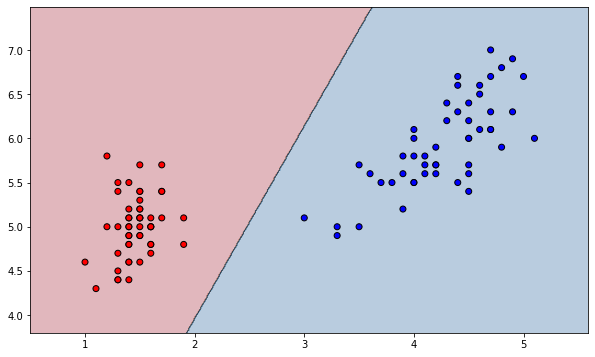

In [11]:
# I could either use my implementation, which is working but not as beautiful...
# (but at least plotting everything that was asked for)

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_db(X_data, y_target, clf):
    plt.figure(figsize=(10,6))
    
    x_min, x_max = X_data[:,0].min() - 0.5, X_data[:,0].max() + 0.5
    y_min, y_max = X_data[:,1].min() - 0.5, X_data[:,1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contour(xx, yy, Z, colors='k', linewidths=0.1)
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.3)
    plt.scatter(X_data[:,0], X_data[:,1], c=y_target,
                cmap=ListedColormap(['#FF0000', '#0000FF']), edgecolors='k')

plot_db(X, y, clf)

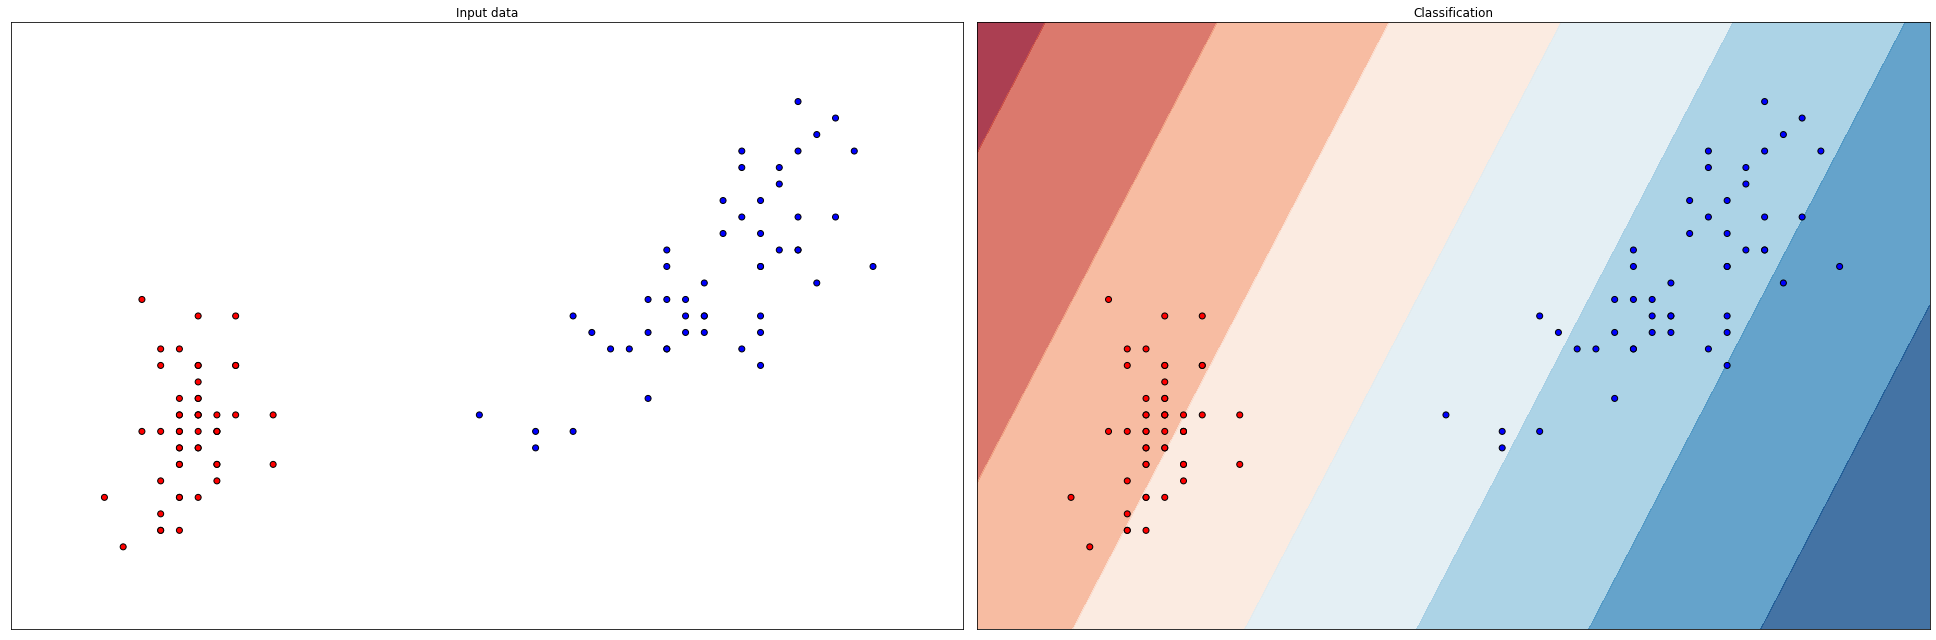

In [12]:
# ... or adapt to the solution that was presented to me by the tutor


import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_regions(data, target, clf):
    """
      Displays a plot with the points and the decision boundaries
        ----------
       data : 2D numpy array for x,y 
       target : labels
        -------
    return plot 
    """    
    figure = plt.figure(figsize=(27, 9))
    x_min, x_max = data[:, 0].min() - .5, data[:, 0].max() + .5
    y_min, y_max = data[:, 1].min() - .5, data[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                         np.arange(y_min, y_max, .02))
    target = target.flatten()

    # plot just data 
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(1, 2, 1)
    ax.set_title("Input data")
    ax.scatter(data[:, 0], data[:, 1], c=target, cmap=cm_bright,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    
    # plot with decision boundaries
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    ax = plt.subplot(1, 2, 2)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
    ax.scatter(data[:, 0], data[:, 1], c=target, cmap=cm_bright,
               edgecolors='k')
    
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title("Classification")
    
    plt.tight_layout()
    plt.show()

plot_decision_regions(X, y, clf)